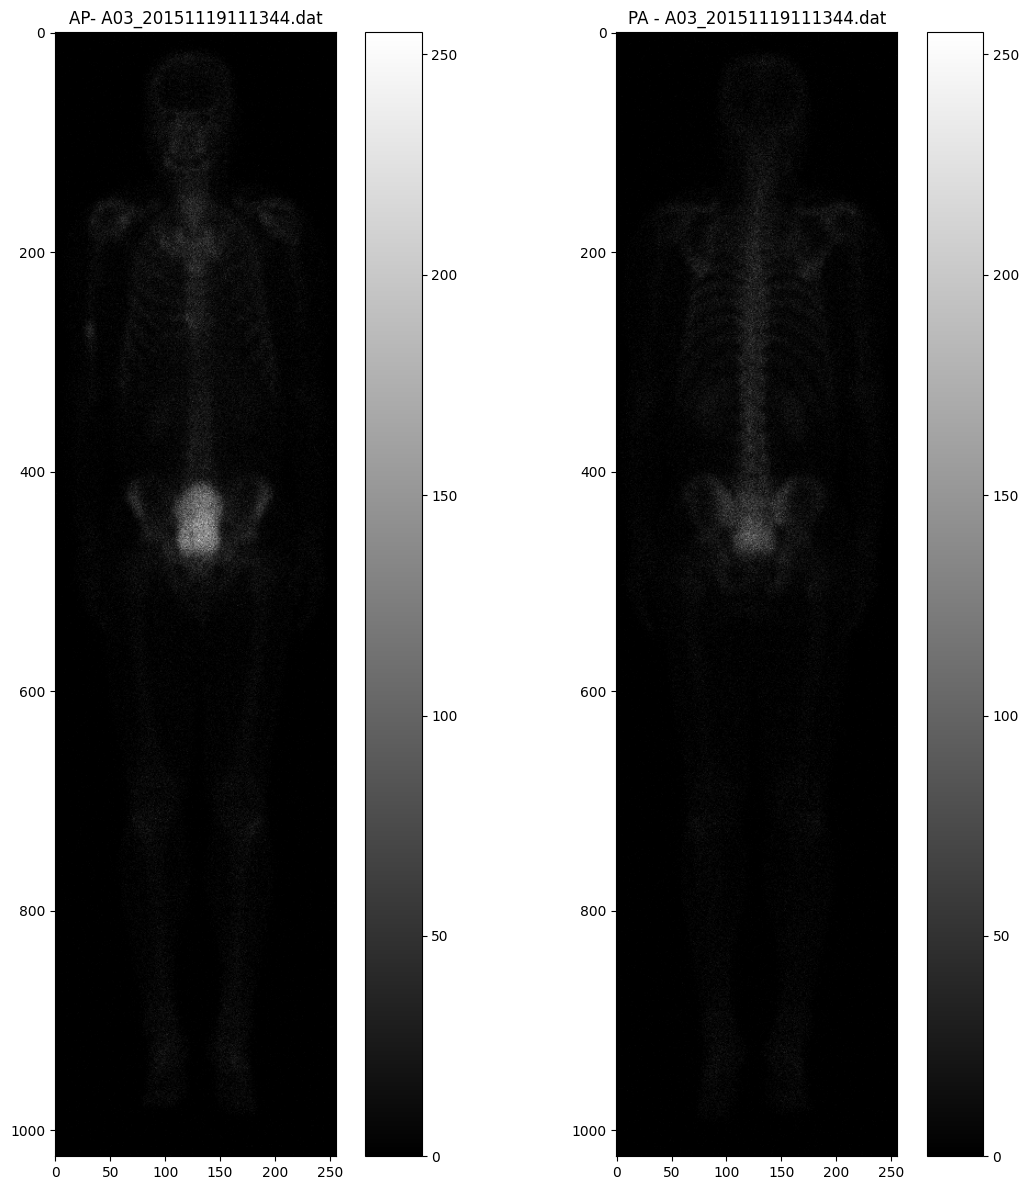

已加载并显示文件: A03_20151119111344.dat
数据形状: (2, 1024, 256)
数据类型: float32
数据范围: 最小值 = 0.0, 最大值 = 228.0


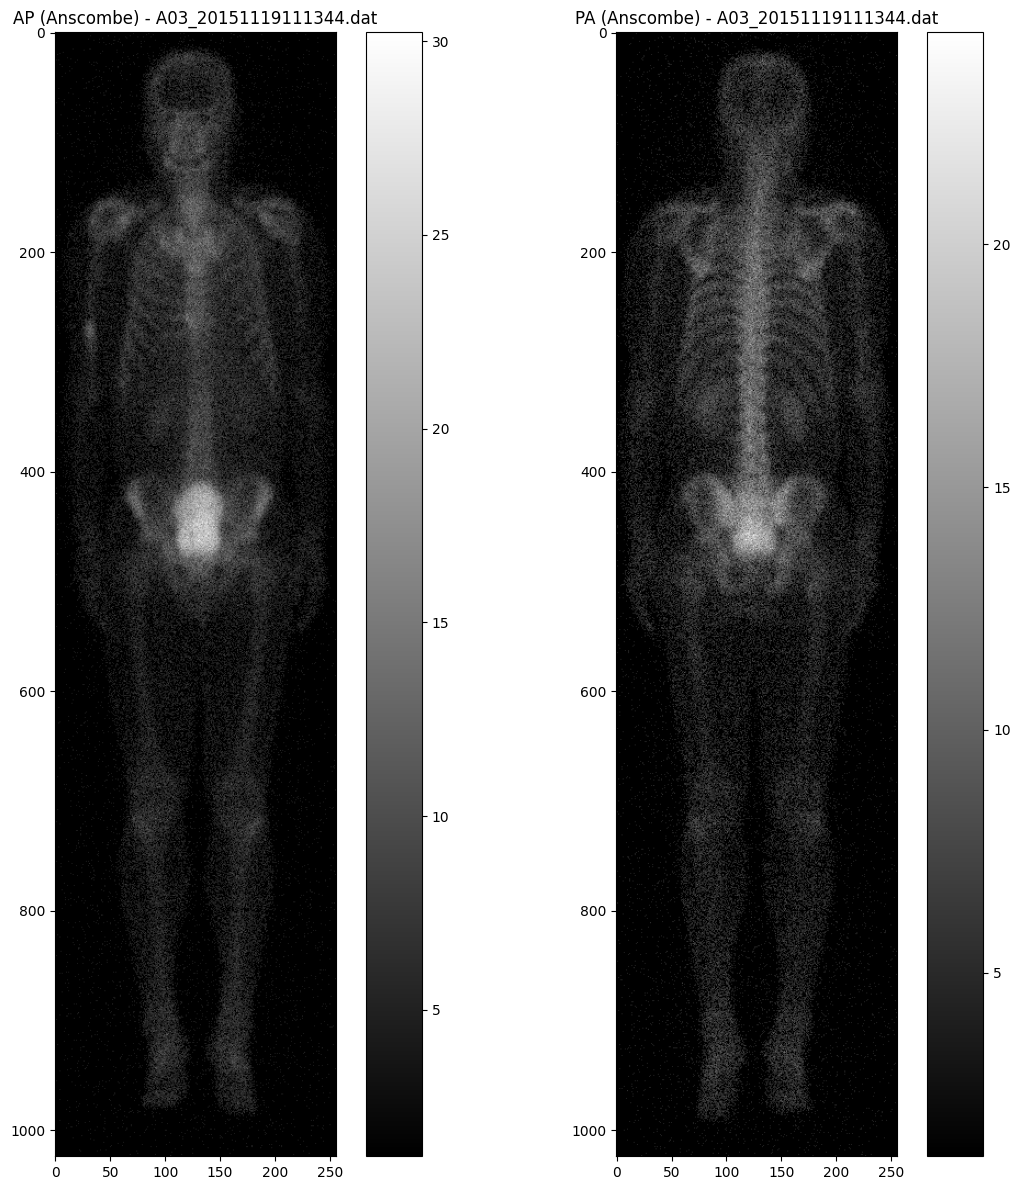

Anscombe变换后数据范围: 最小值 = 1.22, 最大值 = 30.22


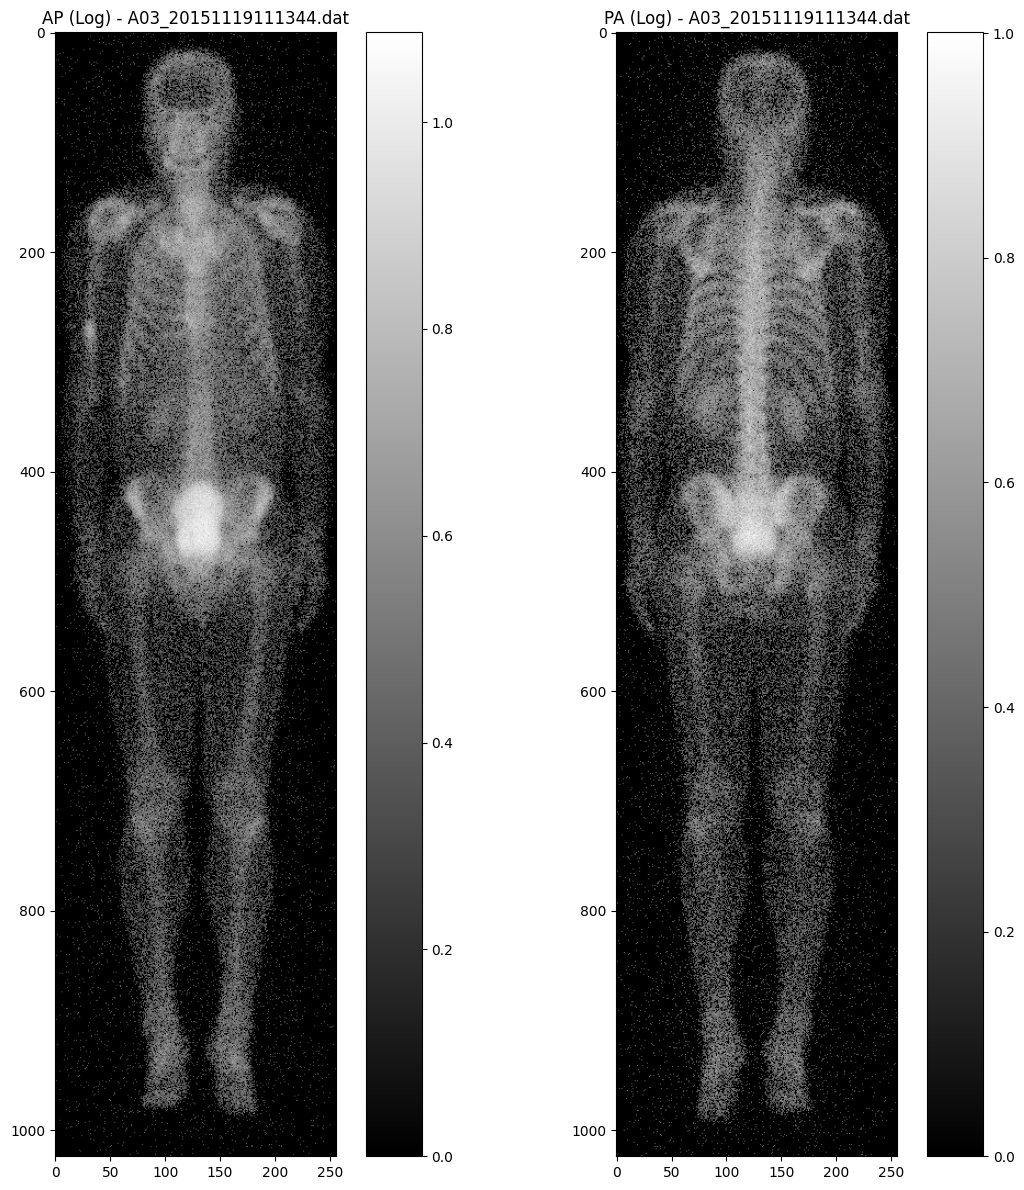

对数变换后数据范围: 最小值 = 0.00, 最大值 = 1.09


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 定义数据目录
data_dir = 'testsets/spectL_4x'

# 获取目录中的所有dat文件
dat_files = [f for f in os.listdir(data_dir) if f.endswith('.dat')]

# 选择一个文件进行读取和显示
if dat_files:
    # 选择第一个文件
    file_path = os.path.join(data_dir, dat_files[4])
    
    # 读取dat文件，格式为float32，大小为2*1024*256
    data = np.fromfile(file_path, dtype=np.float32)
    
    # 重塑数据为正确的形状
    data = data.reshape(2, 1024, 256)
    
    # 创建图形以显示两个通道
    plt.figure(figsize=(12, 12))
    
    # 显示第一个通道
    plt.subplot(1, 2, 1)
    plt.imshow(data[0], cmap='grey',vmin=0,vmax=255)
    plt.colorbar()
    plt.title(f'AP- {dat_files[0]}')
    
    # 显示第二个通道
    plt.subplot(1, 2, 2)
    plt.imshow(data[1], cmap='grey',vmin=0,vmax=255)
    plt.colorbar()
    plt.title(f'PA - {dat_files[0]}')
    
    plt.tight_layout()
    plt.show()
    
    print(f"已加载并显示文件: {dat_files[0]}")
    print(f"数据形状: {data.shape}")
    print(f"数据类型: {data.dtype}")
    print(f"数据范围: 最小值 = {data.min()}, 最大值 = {data.max()}")
else:
    print("在指定目录中未找到dat文件")
# 定义Anscombe变换函数
def anscombe_transform(x):
    return 2 * np.sqrt(x + 3/8)

# 对两个通道分别进行Anscombe变换
data_anscombe = np.zeros_like(data, dtype=np.float32)
data_anscombe[0] = anscombe_transform(data[0])
data_anscombe[1] = anscombe_transform(data[1])

# 创建新的图形显示变换后的结果
plt.figure(figsize=(12, 12))

# 显示第一个通道的Anscombe变换结果
plt.subplot(1, 2, 1)
plt.imshow(data_anscombe[0], cmap='grey')
plt.colorbar()
plt.title(f'AP (Anscombe) - {dat_files[0]}')

# 显示第二个通道的Anscombe变换结果  
plt.subplot(1, 2, 2)
plt.imshow(data_anscombe[1], cmap='grey')
plt.colorbar()
plt.title(f'PA (Anscombe) - {dat_files[0]}')

plt.tight_layout()
plt.show()

print(f"Anscombe变换后数据范围: 最小值 = {data_anscombe.min():.2f}, 最大值 = {data_anscombe.max():.2f}")

# 定义对数变换函数
def log_transform(x):
    return np.log(x + 1.0) / 5

# 对两个通道分别进行对数变换
data_log = np.zeros_like(data, dtype=np.float32)
data_log[0] = log_transform(data[0])
data_log[1] = log_transform(data[1])

# 创建新的图形显示对数变换后的结果
plt.figure(figsize=(12, 12))

# 显示第一个通道的对数变换结果
plt.subplot(1, 2, 1)
plt.imshow(data_log[0], cmap='grey')
plt.colorbar()
plt.title(f'AP (Log) - {dat_files[0]}')

# 显示第二个通道的对数变换结果
plt.subplot(1, 2, 2)
plt.imshow(data_log[1], cmap='grey')
plt.colorbar()
plt.title(f'PA (Log) - {dat_files[0]}')

plt.tight_layout()
plt.show()

print(f"对数变换后数据范围: 最小值 = {data_log.min():.2f}, 最大值 = {data_log.max():.2f}")


In [4]:
import random

import wandb

# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    entity="owen1b-tsinghua-university",
    # Set the wandb project where this run will be logged.
    project="test",
    # Track hyperparameters and run metadata.
    config={
        "learning_rate": 0.02,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": 10,
    },
)

# Simulate training.
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset

    # Log metrics to wandb.
    run.log({"acc": acc, "loss": loss})
    # 创建一个示例图像并记录到wandb
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 创建一个示例图像 - 模拟骨扫描图像
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # 生成模拟数据
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z1 = np.sin(X) * np.cos(Y) * 100 + 100  # AP视图模拟
    Z2 = np.cos(X) * np.sin(Y) * 100 + 100  # PA视图模拟
    
    # 绘制图像
    im1 = ax[0].imshow(Z1, cmap='gray', vmin=0, vmax=200)
    ax[0].set_title('AP视图 - 模拟数据')
    plt.colorbar(im1, ax=ax[0])
    
    im2 = ax[1].imshow(Z2, cmap='gray', vmin=0, vmax=200)
    ax[1].set_title('PA视图 - 模拟数据')
    plt.colorbar(im2, ax=ax[1])
    
    plt.tight_layout()
    
    # 记录图像到wandb
    wandb.log({"bone_scan_simulation": wandb.Image(fig)})
    
    # 关闭图像以释放内存
    plt.close(fig)

# Finish the run and upload any remaining data.
run.finish()

/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3612720/3162216892.py:52: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/owen/miniconda3/envs/KAIR/lib/python3.11/site-packages/wandb/sdk/data_

acc,▁▁▅▆▇▇█▇
loss,█▇▄▂▄▁▁▂
acc,0.85186
loss,0.10947


In [1]:
# 导入必要的库
import sys
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

# 添加项目根目录到系统路径，确保可以导入自定义模块
sys.path.append(os.path.dirname(os.path.abspath('.')))

# 导入SPECT数据集
from data.dataset_spectpatch import DatasetSPECTPatch

# 设置数据集参数
opt = {
    'phase': 'train',
    'n_channels': 2,
    'H_size': 64,
    'dataroot_H': 'trainsets/spectH',  # 高剂量数据路径
    'dataroot_L': 'trainsets/spectL_4X',  # 低剂量数据路径
    'num_patches_per_image': 40,
    'num_sampled': 10,  # 设置较小的值以便快速测试
    'normalization': 'log'
}

# 创建数据集实例
dataset = DatasetSPECTPatch(opt)

# 输出数据集长度
print(f'数据集长度: {len(dataset)}')

# 获取一个样本并显示其形状
sample = dataset[0]
print(f'样本L形状: {sample["L"].shape}')
print(f'样本H形状: {sample["H"].shape}')

# 创建数据加载器
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# 获取一个批次并显示其形状
for batch in dataloader:
    print(f'批次L形状: {batch["L"].shape}')
    print(f'批次H形状: {batch["H"].shape}')
    break


训练数据已更新！总patch数量:  3.00 X 128.00 = 400.00

数据集长度: 400
样本L形状: torch.Size([2, 64, 64])
样本H形状: torch.Size([2, 64, 64])
批次L形状: torch.Size([4, 2, 64, 64])
批次H形状: torch.Size([4, 2, 64, 64])


原始值: [0, 1.1, 255, 256]
归一化后转换为uint8: [  0   1 254 255]
裁剪后转换为uint8: [  0   1 255 255]


/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_182856/1247323847.py:37: UserWarning: Glyph 25442 (\N{CJK UNIFIED I

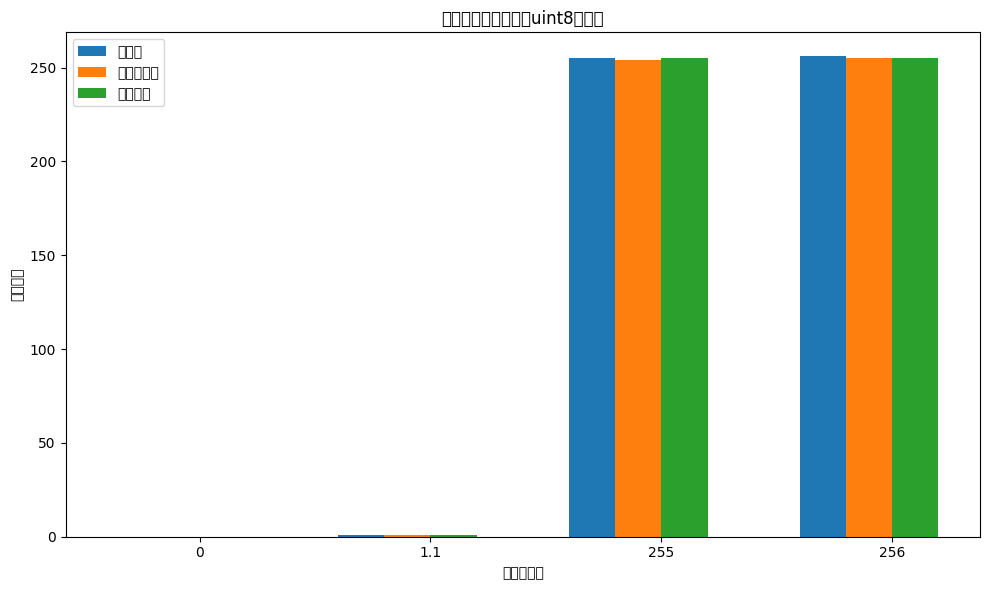

In [12]:
# 将不同范围的数值转换为uint8类型（0-255）
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
values = [0, 1.1, 255, 256]
print(f"原始值: {values}")

# # 方法1：直接截断并转换为uint8
# uint8_direct = np.array(values, dtype=np.uint8)
# print(f"直接转换为uint8: {uint8_direct}")

# 方法2：先归一化到[0,1]，再缩放到[0,255]，最后转换为uint8
normalized = np.array(values) / np.max(values)  # 归一化到[0,1]
uint8_normalized = (normalized * 255).astype(np.uint8)
print(f"归一化后转换为uint8: {uint8_normalized}")

# 方法3：先裁剪到[0,255]，再转换为uint8
clipped = np.clip(values, 0, 255)
uint8_clipped = clipped.astype(np.uint8)
print(f"裁剪后转换为uint8: {uint8_clipped}")

# 可视化不同方法的结果
fig, ax = plt.subplots(figsize=(10, 6))
methods = ['原始值',  '归一化转换', '裁剪转换']
results = [values,  uint8_normalized, uint8_clipped]

for i, (method, result) in enumerate(zip(methods, results)):
    ax.bar(np.arange(len(values)) + i*0.2, result, width=0.2, label=method)

ax.set_xlabel('输入值索引')
ax.set_ylabel('转换结果')
ax.set_title('不同方法将值转换为uint8的比较')
ax.set_xticks(np.arange(len(values)) + 0.3)
ax.set_xticklabels([f"{v}" for v in values])
ax.legend()
plt.tight_layout()
plt.show()
